In [8]:
import numpy as np
import MSDimports

path='Data/CSVFiles_200/'

dT=0.15
frames=200
xp=np.zeros((frames,276,291))
yp=np.zeros((frames,276,291))

for j in range(1,frames+1):
    xval=np.genfromtxt(path+'XP_' + f'{j:02}' + '.txt', delimiter=',')
    yval=np.genfromtxt(path+'YP_' + f'{j:02}' + '.txt', delimiter=',')
    xp[j-1]=xval
    yp[j-1]=yval

mask_nuc=np.genfromtxt(path+'mask.txt', delimiter=',')

In [9]:
MSD=MSDimports.MSDcalculation(xp,yp,mask_nuc)

In [11]:
import MSDBayesimports

models_selected=np.array(['D','DA','V','DV','DAV'])
#models_selected=np.array(['N','D','DA','DR','V','DV','DAV','DRV'])
Bayes=MSDBayesimports.MSDBayes(MSD, dT, models_selected)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Bayesian inference..
Using # cores:8


  0%|          | 0/47092 [00:00<?, ?it/s]<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen import

Text(0.5, 1.0, 'Drift velocity [$\\mu$m/s]')

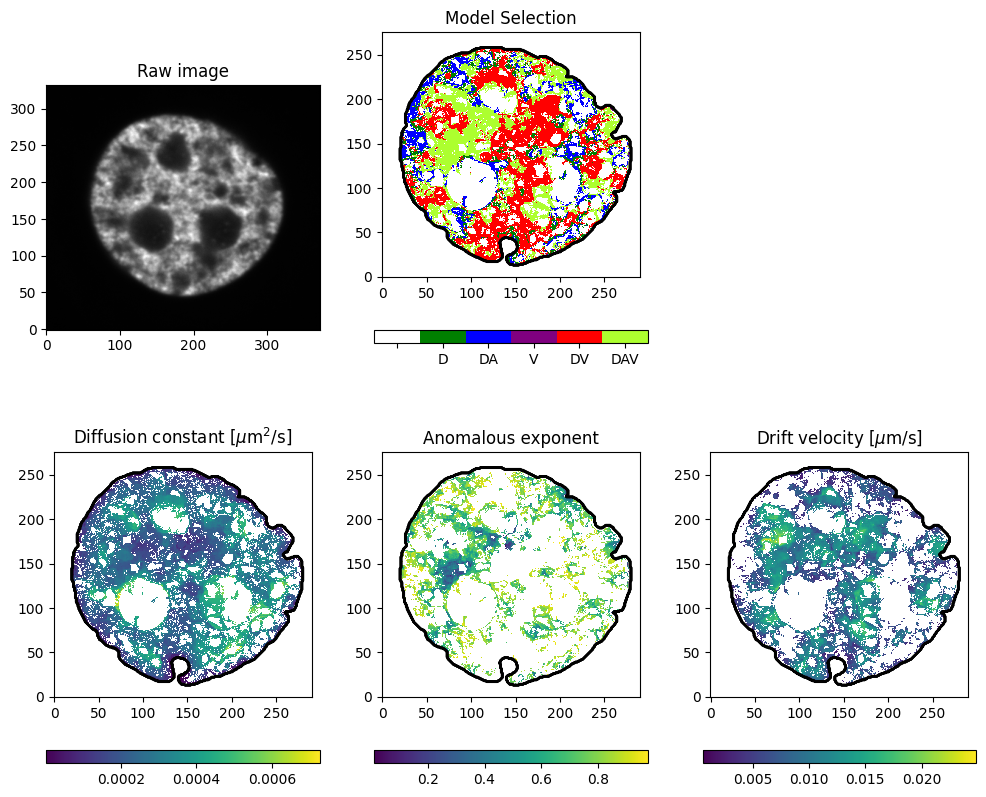

In [12]:
from pylab import *
from matplotlib import colors

matrix1=np.zeros((276,291))
matrix1[np.where(mask_nuc==1)]=100

imraw=imread('Data/sequence1.tif')
bounds = [0.5, 1.5, 2.5, 3.5, 4.5]

fig,ax=plt.subplots(2,3,figsize=[12,10])
ax[0,2].axis('off')

img0=ax[0,0].imshow(imraw,origin='lower',cmap='gray')
ax[0,0].set_title('Raw image')

cmap = colors.ListedColormap(['w','g','b','purple','r','greenyellow'])
img1=ax[0,1].imshow(Bayes['model'], interpolation='nearest',cmap=cmap,origin='lower')
ax[0,1].contour(matrix1, colors='k', origin='lower')

cbar=fig.colorbar(img1,ax=ax[0,1],spacing='proportional',orientation='horizontal',boundaries=[-0.5] + bounds + [5.5])
labels = np.arange(0, 6, 1)
loc = labels
cbar.set_ticks(loc)
cbar.set_ticklabels([' ','D','DA','V','DV','DAV'])
ax[0,1].set_title('Model Selection')

matD=[]
matD=Bayes['D']
matD[np.where(Bayes['model']==0)]=np.nan
matD[np.where(Bayes['D']<1e-10)]=np.nan

# #figure(2)
img2=ax[1,0].imshow(matD, interpolation='nearest',cmap='viridis',origin='lower')
ax[1,0].contour(matrix1, colors='k', origin='lower')
fig.colorbar(img2,ax=ax[1,0],spacing='proportional',orientation='horizontal')
ax[1,0].set_title(r'Diffusion constant [$\mu$m$^2$/s]')

matA=[]
matA=Bayes['A']
matA[np.where(Bayes['model']==0)]=np.nan
matA[np.where(Bayes['A']<1e-10)]=np.nan

# #figure(3)
img3=ax[1,1].imshow(matA, interpolation='nearest',cmap='viridis',origin='lower')
ax[1,1].contour(matrix1, colors='k', origin='lower')
fig.colorbar(img3,ax=ax[1,1],spacing='proportional',orientation='horizontal')
ax[1,1].set_title('Anomalous exponent')

matV=[]
matV=Bayes['V']
matV[np.where(Bayes['model']==0)]=np.nan
matV[np.where(Bayes['V']==0)]=np.nan

# #figure(4)
img4=ax[1,2].imshow(matV, interpolation='nearest',cmap='viridis',origin='lower')
ax[1,2].contour(matrix1, colors='k', origin='lower')
fig.colorbar(img4,ax=ax[1,2],spacing='proportional',orientation='horizontal')
ax[1,2].set_title(r'Drift velocity [$\mu$m/s]')


In [5]:
# Save pickle file per cell

import pickle


with open('Results_Bayes_04102022_Cell01.pickle', 'wb') as f:
    pickle.dump(Bayes, f)